In [341]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.proportion as smp
import statsmodels.stats.weightstats as stm
import math
from scipy import stats

In [350]:
#1.prepare the data
df1 = pd.read_csv('dataset1.csv')
print(df1.head())
print(df1.isnull().sum() )
print(df1.shape)

df2 = pd.read_csv('dataset2.csv')
print(df2.head())
print(df2.isnull().sum() )
print(df2.shape)


most_frequent = df1['habit'].mode()[0]
print(most_frequent)

#fill the missing values (NaN) in the 'habit' column of df1
#with the most_frequent
df1['habit'] = df1['habit'].fillna(most_frequent)








         start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   

     rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  30/12/2017 18:38                        108     1       0      0   
1  30/12/2017 19:55                         17     0       1      0   
2  30/12/2017 19:55                         41     0       1      0   
3  30/12/2017 19:55                        111     1       0      0   
4  30/12/2017 19:55                        194     1       0      0   

        sunset_time  hours_after_sunset  season  
0  30/12/2017 16:45            1.870833       0  
1  30/12/2017 16:45            3.100833       0  
2  30/12/2017 

In [349]:
#2.1 descriptive statistics

des=df1['bat_landing_to_food'].describe()
print(des)




median=df1['bat_landing_to_food'].median()
print(median)

#compute IQR

Q2 = np.percentile(df1['bat_landing_to_food'],50)
print(f'50% :{Q2}')
Q1 = np.percentile(df1['bat_landing_to_food'],25)
print(f'25% :{Q1}')

Q3 = np.percentile(df1['bat_landing_to_food'],75)
print(f'75% :{Q3}')

IQR=Q3-Q1
print(f'IQR :{IQR}')


#ci
x_bar = df1['bat_landing_to_food'].mean()
s = df1['bat_landing_to_food'].std()
n = len(df1)

z_score= st.norm.ppf(0.975)
print(f'z_score: {z_score:.2f}')

std_err =s/math.sqrt(n)


ci_low_tw, ci_upp_tw = stm._zconfint_generic(x_bar, std_err, alpha=0.05, alternative="two-sided")
print(f"Two-sided 95% CI: {ci_low_tw:.2f} to {ci_upp_tw:.2f}")

ci_low_up, ci_upp_up = stm._zconfint_generic(x_bar, std_err, alpha=0.05, alternative="larger")
print(f"One-sided (upper) 95% CI: {ci_low_up:.2f} to {ci_upp_up:.2f}")
ci_low_down, ci_upp_down = stm._zconfint_generic(x_bar, std_err, alpha=0.05, alternative="smaller")
print(f"One-sided (lower) 95% CI: {ci_low_down:.2f} to {ci_upp_down:.2f}")


count    907.000000
mean      11.713134
std       27.644410
min        0.010238
25%        1.000000
50%        4.000000
75%       11.500000
max      443.000000
Name: bat_landing_to_food, dtype: float64
4.0
50% :4.0
25% :1.0
75% :11.5
IQR :10.5
z_score: 1.96
Two-sided 95% CI: 9.91 to 13.51
One-sided (upper) 95% CI: 10.20 to inf
One-sided (lower) 95% CI: -inf to 13.22


In [351]:
2.2 #risk's frequency and propotion

risk_count= df1['risk'].value_counts()
print(risk_count)

risk_precentage=df1['risk'].value_counts(normalize=True) * 100
print(f'risk_precentage: {risk_precentage.round(2)}')

prop=df1['risk'].sum() #count of risk-taking
total=len(df1) #total number of observations.
conf_lvl=0.95 #confidence level
a=0.05 #signifcent

ci_low, ci_upp = smp.proportion_confint(prop, total, alpha=a, method='normal')
print(f"95% CI for risk proportion (normal): {ci_low:.3f} to {ci_upp:.3f}")


risk
0    458
1    449
Name: count, dtype: int64
risk_precentage: risk
0    50.5
1    49.5
Name: proportion, dtype: float64
95% CI for risk proportion (normal): 0.463 to 0.528


In [345]:
#3.1 this line groups the data by both 'season' and 'risk' and counts the number of occurrences
#for each combination
season_risk = df1.groupby(['season', 'risk']).size().unstack(fill_value=0)
season_risk['risk_ratio'] = season_risk[1] / (season_risk[0]+season_risk[1])
print(f"season_risk:{season_risk.round(2)}")



season_risk:risk      0    1  risk_ratio
season                      
0        66   85        0.56
1       392  364        0.48


In [346]:
#3.2 this line groups the data by both 'month' and 'risk' and counts the number of occurrences
#for each combination
month_risk = df1.groupby(['month', 'risk']).size().unstack(fill_value=0)
month_risk['risk_ratio'] = month_risk[1] / (month_risk[0]+month_risk[1])
print(f"month_risk:{month_risk.round(2)}")

month_risk:risk     0    1  risk_ratio
month                      
0       12   14        0.54
1       21   12        0.36
2       33   59        0.64
3       16   10        0.38
4      277  221        0.44
5       99  133        0.57


In [347]:
#3.3 his line counts the occurrences of each unique value in the 'habit' column and prints the counts
#This helps you see the distribution of different bat behaviours in the dataset
print(df1['habit'].value_counts())

valid_habits = ['fast', 'rat', 'pick', 'bat', 'bat_fight', 'rat_bat_fight', 'rat_disappear', 'rat_pick', 'rat_pick_and_bat', 'rat_to_bat']
df1['habit_category'] = df1['habit'].apply(lambda x: x if x in valid_habits else 'other')

habit_risk = df1.groupby(['habit_category', 'risk']).size().unstack(fill_value=0)
habit_risk['risk_ratio'] = habit_risk[1] / (habit_risk[0] + habit_risk[1])
print(habit_risk.round(2))


habit
fast                                                286
rat                                                 221
pick                                                139
bat                                                  30
bat_fight                                            26
                                                   ... 
bat_fight_and_rat                                     1
rat_and_rat                                           1
not_sure_rat                                          1
501.0,358.4,636.2,423.4; 476.0,103.0,634.0,206.0      1
rat_and_bat_and_pick                                  1
Name: count, Length: 81, dtype: int64
risk                0    1  risk_ratio
habit_category                        
bat                 0   30        1.00
bat_fight           0   26        1.00
fast              286    0        0.00
other              33  154        0.82
pick              139    0        0.00
rat                 0  221        1.00
rat_bat_fight       0    1  

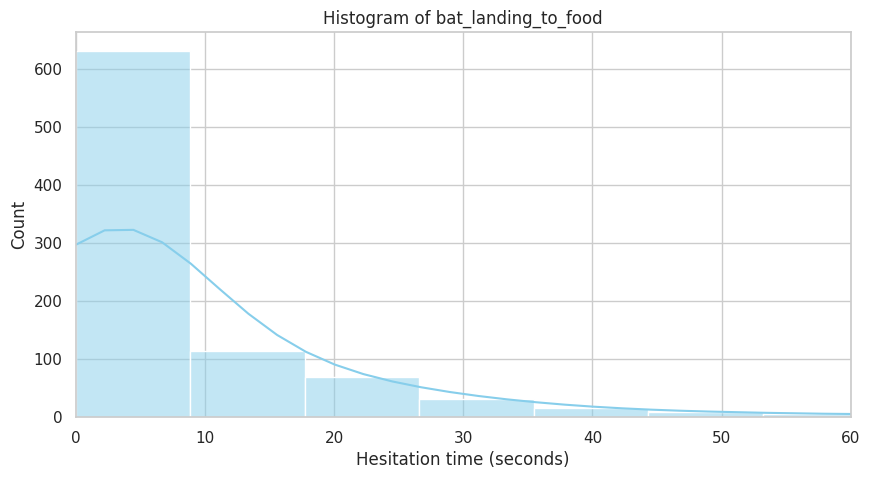

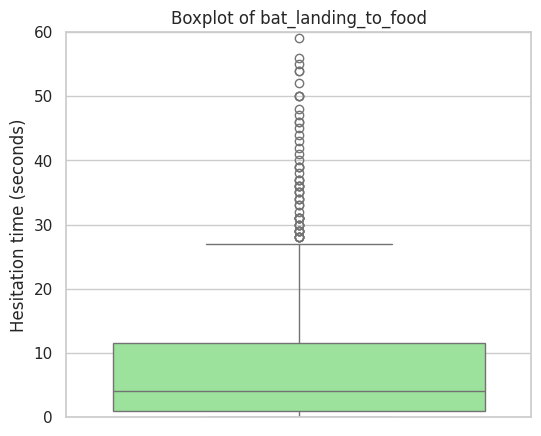

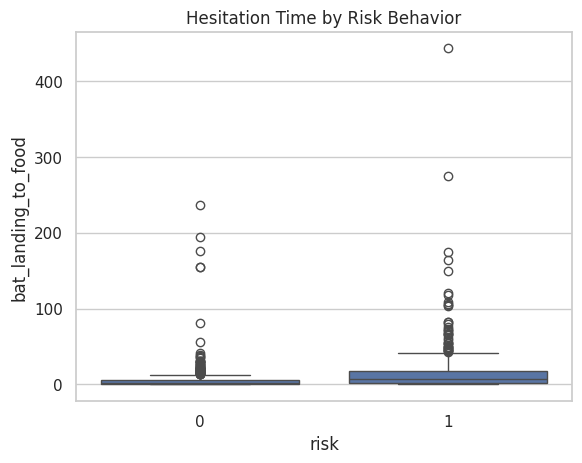

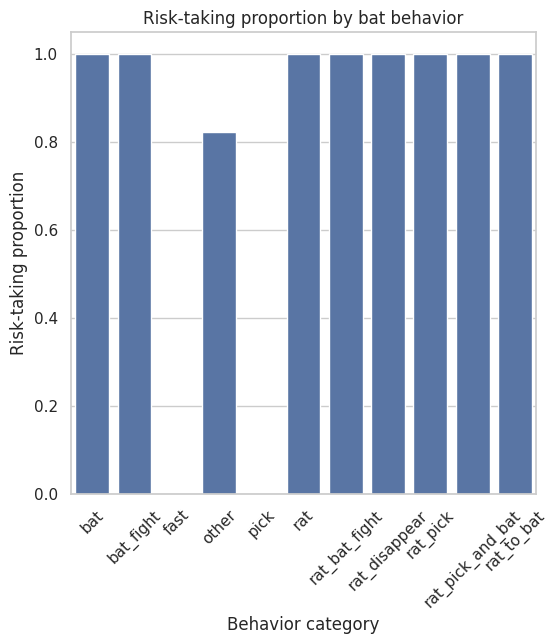

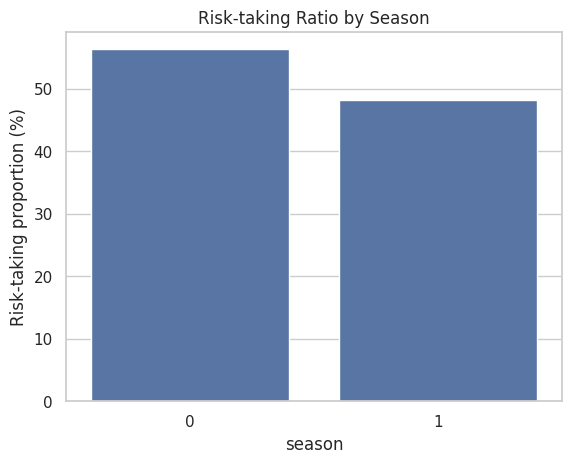

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


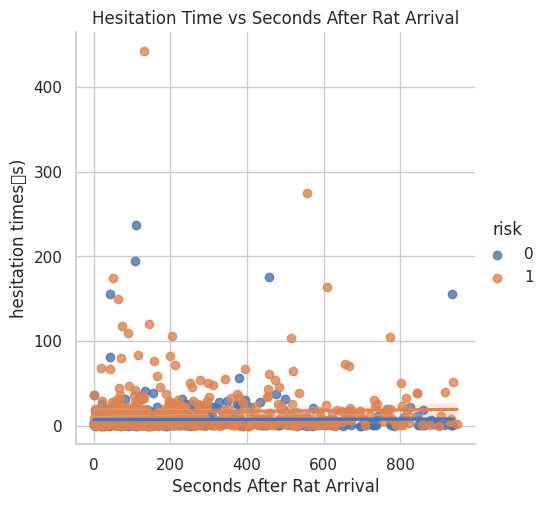

In [352]:
'''4.This code generates several visualizations to explore
the distribution of 'bat_landing_to_food' and
 its relationship with 'risk', 'habit', and 'season'.'''


sns.set(style="whitegrid")

# 1. histogram of bat_landing_to_food
plt.figure(figsize=(10,5))
sns.histplot(df1['bat_landing_to_food'], bins=50, kde=True, color='skyblue')
plt.title("Histogram of bat_landing_to_food")
plt.xlabel("Hesitation time (seconds)")
plt.ylabel("Count")
plt.xlim(0, 60)
plt.show()

# 2. boxplot of bat_landing_to_food
plt.figure(figsize=(6,5))
sns.boxplot(y=df1['bat_landing_to_food'], color='lightgreen')
plt.title("Boxplot of bat_landing_to_food")
plt.ylabel("Hesitation time (seconds)")
plt.ylim(0, 60)
plt.show()




# 3. boxplot: hesitation by risk
sns.boxplot(x='risk', y='bat_landing_to_food', data=df1)
plt.title("Hesitation Time by Risk Behavior")
plt.show()


#4. barplot: Risk proportion by bat behaviour
plt.figure(figsize=(6,6))
sns.barplot(x=habit_risk.index, y=habit_risk['risk_ratio'])
plt.ylabel('Risk-taking proportion')
plt.xlabel('Behavior category')
plt.xticks(rotation=45)
plt.title('Risk-taking proportion by bat behavior')
plt.show()


# 5. barplot: risk proportion by season
sns.barplot(x=season_risk.index, y=season_risk['risk_ratio']*100)
plt.ylabel("Risk-taking proportion (%)")
plt.title("Risk-taking Ratio by Season")
plt.show()

# 6. scatter + regression: hesitation vs seconds after rat arrival
sns.lmplot(x='seconds_after_rat_arrival', y='bat_landing_to_food', hue='risk', data=df1)
plt.title("Hesitation Time vs Seconds After Rat Arrival")
plt.xlabel("Seconds After Rat Arrival")
plt.ylabel("hesitation times（s)")
plt.show()



